# House Price Prediction

The data here is from a competition on Kaggle. Kaggle is a website for data-scientists where big companies usually host competitions to solve a specific challenge and everyone competes to win. The specfic data here is from a competition called "House Prices: Advanced Regression Techniques". Here is the competition descirption:

"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home."

In this notebook, I'll walk through the basic steps of any machines learning project: 1-Loading the data 2-Data visualization 3-Data cleaning and feature agumentation 4-Predictive analysis

# Imports

First, we import all the libraries we will be using throughout this dataset

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [3]:
PATH = "Data/house-prices-advanced-regression-techniques/"

In [4]:
!ls {PATH}

data_description.txt   sample_submission.csv.gz  test.csv.gz  train.csv.gz
sample_submission.csv  test.csv			 train.csv


# Loading the data

In [5]:
df_raw = pd.read_csv(f'{PATH}train.csv')

In [6]:
#function to display all data 
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [8]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Visualization

Before going any further, let's look at our category of interest, SalesPrice, and see its relationship with other variables

In [10]:
df_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


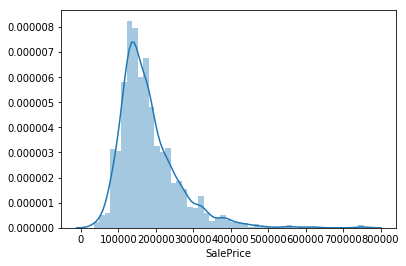

In [11]:
#histogram
sns.distplot(df_raw['SalePrice']);

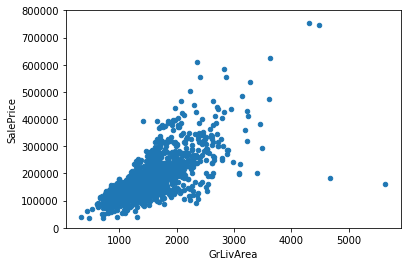

In [12]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

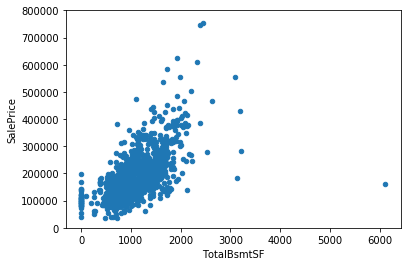

In [13]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

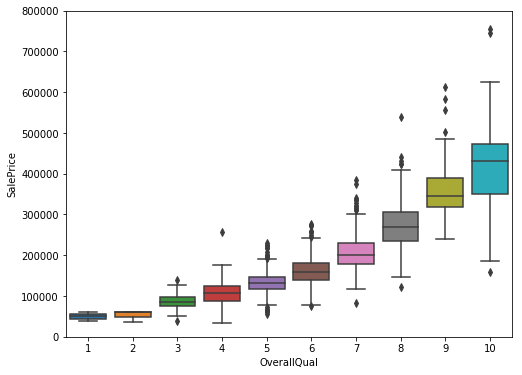

In [14]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

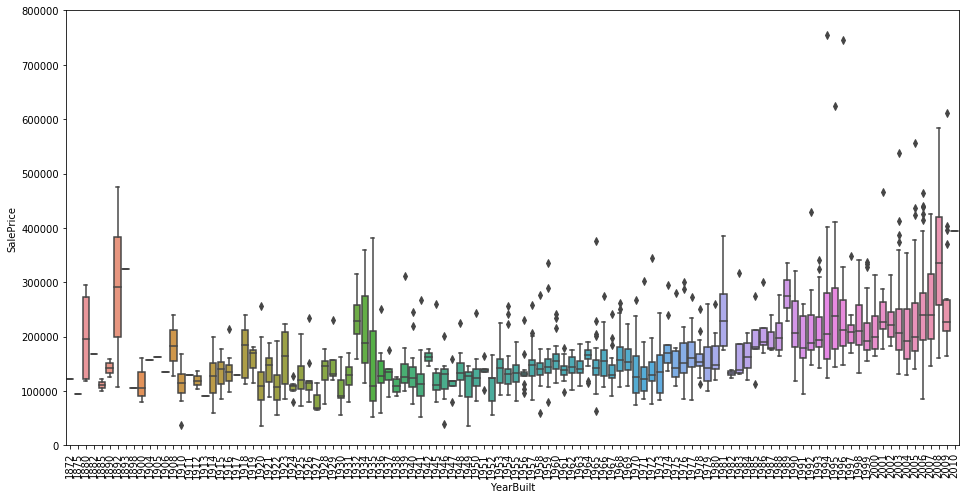

In [15]:
var = 'YearBuilt'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

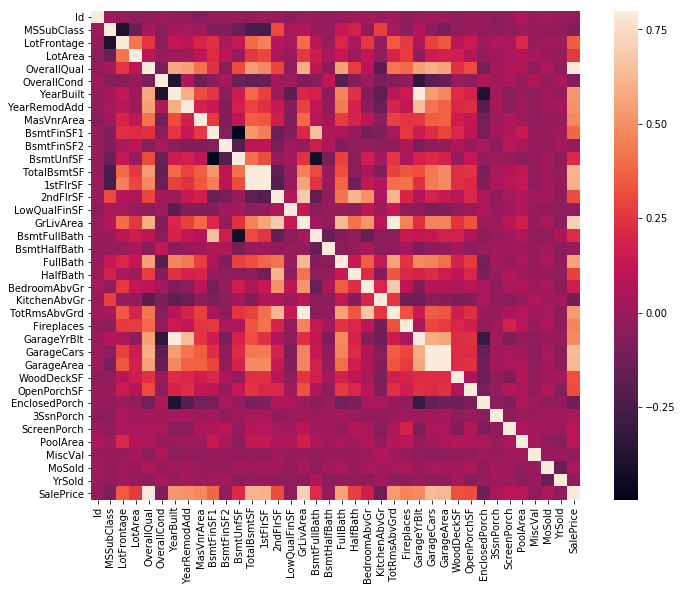

In [16]:
#correlation matrix
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

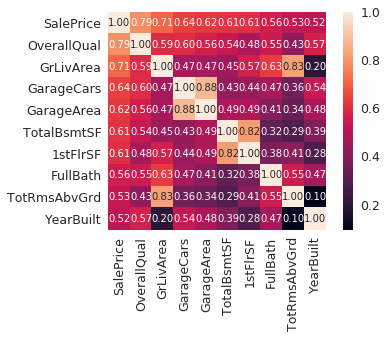

In [17]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_raw[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

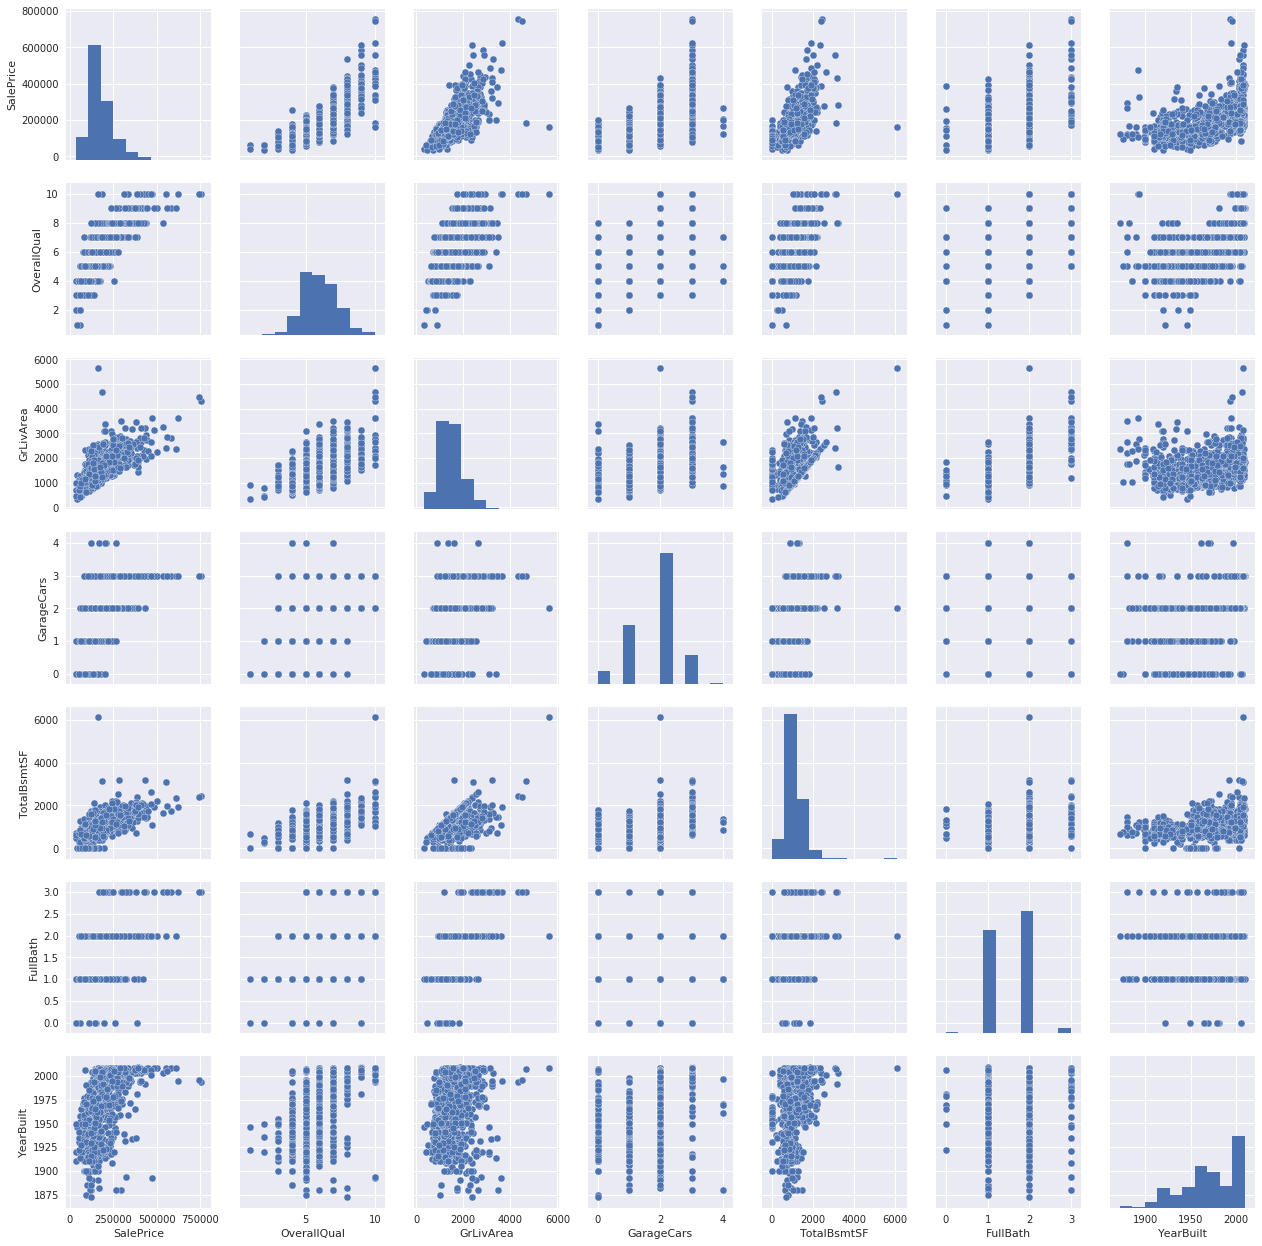

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_raw[cols], size = 2.5)
plt.show();

## Summary of findings:

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the two of them seem redundant
'TotalBsmtSF' and '1stFloor'also seem to be redundnant features
'TotRmsAbvGrd' and 'GrLivArea' also redundant
'YearBuilt' is only slightly correlated. Furhter analysis necessary

# Data cleaning and feature agumentation

This dataset contains a mix of **continuous** and **categorical** variables, as well as missing variables. Here we will take care of all these problems and convert everything to a machine learning ready format

In [19]:
train_cats(df_raw)

In [20]:
# Find missing variables
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
#drop columns where features are missing as they were not important as shown earlier
df_raw = df_raw.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_raw = df_raw.drop(df_raw.loc[df_raw['Electrical'].isnull()].index)
df_raw.isnull().sum().max()

0

We will convert SalePrice to a log since that is how we will be evaluating our performance

In [22]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [23]:
display_all(df_raw.head().T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl


In [24]:
df_raw.reset_index(inplace=True)

In [25]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/regression')

In [26]:
df_raw = pd.read_feather('tmp/regression')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [27]:
df, y, nas = proc_df(df_raw, y_fld='SalePrice')

We now have something we can pass to a random forest!

In [28]:
len(df)

1459

# Modelling

In [29]:
# our very first model
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9749172874753725

While the initial models looks great, there is without a doubt, overfitting that is occuring. Need to create a validation test set to battle this

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3)

Let's try our model again, this time with separate training and validation sets.

In [31]:
# function to calculate root mean squared error

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [32]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 111 ms
[0.06572396401802176, 0.1632589130660415, 0.9735730804376329, 0.822656794834555]


The accuracy of the training is 97% while the accuracy of validation is 82%. This is clear evidence of overfitting which we need to combat

### Single tree (for visualization purposes)

Here is what a single tree looks like

In [33]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.209175306358263, 0.24363398023184765, 0.7323175664792745, 0.6050551342502997]


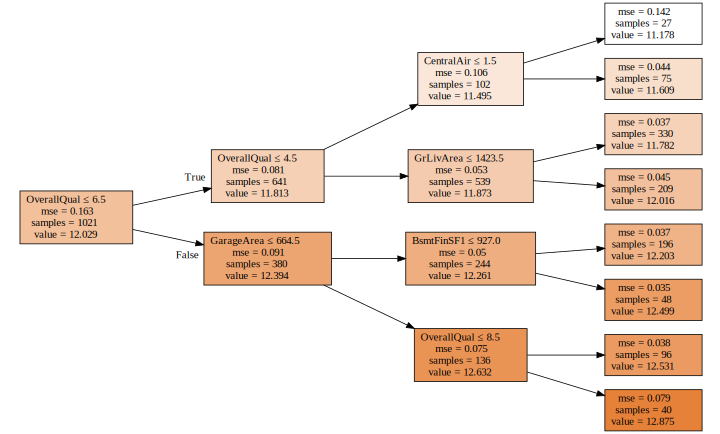

In [34]:
draw_tree(m.estimators_[0], df, precision=3)

Let's see how increasing the number of trees changes results

In [35]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0563385516384842, 0.159239541191843, 0.980581736048549, 0.8312815460867016]


In [36]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0557991185840271, 0.1544787613402089, 0.9809518096684406, 0.8412190819164067]


In [37]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.05320251215098992, 0.1539065419702015, 0.9826833721547996, 0.8423932140647146]


Clearly, we get better validation set performance, now at 84%

## Reducing over-fitting

In [39]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07428637303678659, 0.1613814921374002, 0.9662388404717297, 0.8267121134237869, 0.8717084852881978]


In [43]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08298726497150676, 0.14811211874816763, 0.957867042256919, 0.8540372823025044, 0.8712425860525752]


We have brought our validation set results to 87%. But we are still overfitting

## Feautre Importance

Another way to reduce overfitting is to remove redundant features. Let's take a look at feature importance

In [44]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
16,OverallQual,0.242423
38,GrLivArea,0.147329
24,ExterQual,0.101941
18,YearBuilt,0.056975
49,GarageCars,0.053608
30,TotalBsmtSF,0.053554
50,GarageArea,0.052437
35,1stFlrSF,0.044460
27,BsmtFinSF1,0.023744
4,LotArea,0.023081


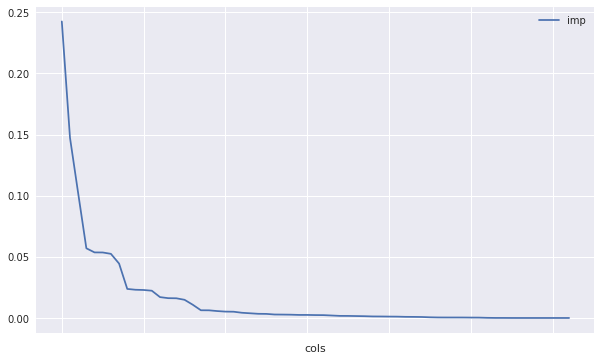

In [46]:
fi.plot('cols', 'imp', figsize=(10,6), legend=True);

In [47]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

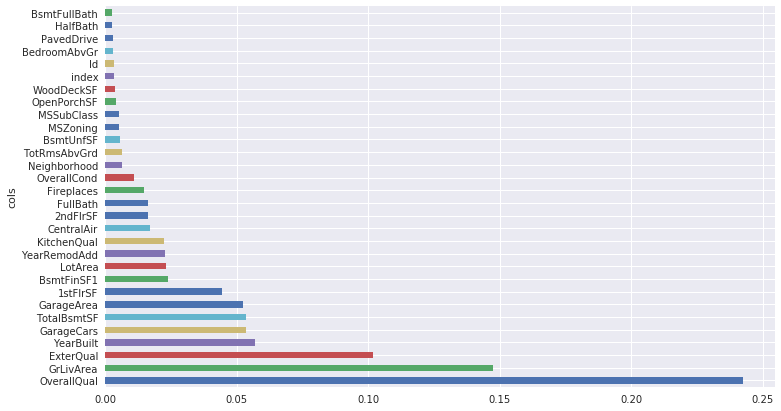

In [48]:
plot_fi(fi[:30]);

In [49]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

22

In [53]:
df = df[to_keep].copy()
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3)

In [56]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08629303975417424, 0.16371532650810303, 0.953015198038586, 0.8345850686408631, 0.873754570833154]


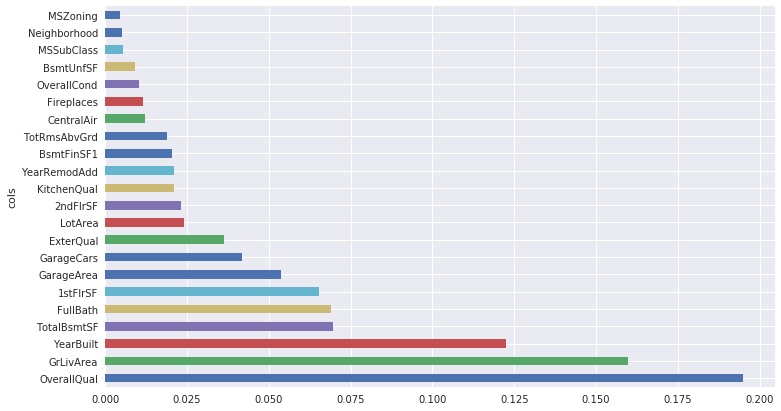

In [58]:
fi = rf_feat_importance(m, df)
plot_fi(fi);

In [59]:
from scipy.cluster import hierarchy as hc

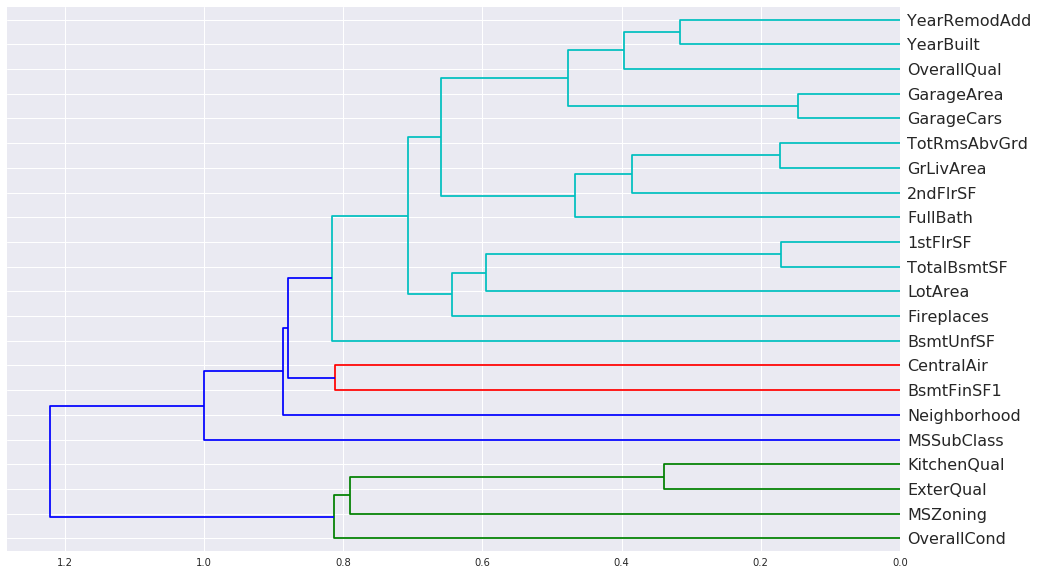

In [60]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [63]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 300
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
raw_train, raw_valid = split_vals(df, n_trn)

In [64]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [66]:
get_oob(df)

0.8581606588981381

In [68]:
for c in ('1stFlrSF','TotalBsmtSF','YearRemodAdd','YearBuilt','GarageArea','GarageCars',
          'TotRmsAbvGrd','GrLivArea','CentralAir','BsmtFinSF1','KitchenQual','ExterQual'):
    print(c, get_oob(df.drop(c, axis=1)))

1stFlrSF 0.8584872085803428
TotalBsmtSF 0.8603412680211169
YearRemodAdd 0.8564149108972758
YearBuilt 0.8599661199079671
GarageArea 0.863766080344444
GarageCars 0.86589269357633
TotRmsAbvGrd 0.8633192559653587
GrLivArea 0.8537340302326435
CentralAir 0.8603231197123447
BsmtFinSF1 0.8597883091871201
KitchenQual 0.8652212989020056
ExterQual 0.8591133163178474


In [70]:
to_drop = ['TotalBsmtSF','GarageCars', 'ExterQual', 'GrLivArea']
get_oob(df.drop(to_drop, axis=1))

0.85196309631998

In [72]:
df.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df, n_trn)

In [74]:
np.save('tmp/keep_cols.npy', np.array(df.columns))

In [83]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df[keep_cols]

In [84]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0911596140420596, 0.14613086575365733, 0.9486210506104326, 0.8585964037782898, 0.8644601748406187]


# Our Final Model

In [101]:
m = RandomForestRegressor(n_estimators=400, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.68 s, sys: 28 ms, total: 1.7 s
Wall time: 805 ms
[0.052098361841515756, 0.13851070385211972, 0.983218591882127, 0.8729592021703144, 0.87668763194811]
